In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,6,20)
funcion = lambda x: ((-x)**(3))+(np.e**(x))-np.sin((x)*3)
y=np.array([funcion(i) for i in x])

In [3]:
m=(y[-1]-y[0])/(x[-1]-x[0])
InterLineal=lambda x,m:m*(x-x[0])+y[0]

In [4]:
Y_Inter=InterLineal(x,m)

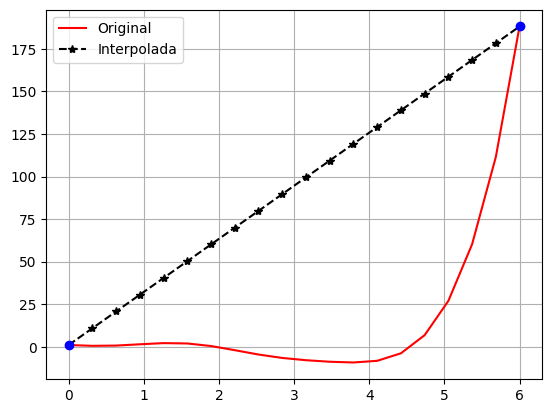

In [5]:
plt.plot(x,y,'-r',label='Original')
plt.plot(x,Y_Inter,'*--k',label='Interpolada')
plt.plot(x[0],y[0],'ob')
plt.plot(x[-1],y[-1],'ob')
plt.legend()
plt.grid()
plt.show()

In [6]:
def Vandermode(x,y):
  n=len(x)-1
  Van=np.zeros((n+1,n+1))
  for col in range(n+1):
    Van[:,col]=x**col

  y=y.reshape(-1,1)

  sol=LA.solve(Van,y)
  return sol

In [7]:
def evaluacion(x,y,Xint):
  As=Vandermode(x,y)
  Yint=[]
  for Iele in Xint:
    inter=0.0
    for i in range(1,len(As)):
      inter+=As[i]*Iele**i
    inter+=As[0]
    Yint.append(inter)

  return np.array(Yint)

In [8]:
XX=[1.4,3.4,4.2,5.2]
YY=evaluacion(x,y,XX)

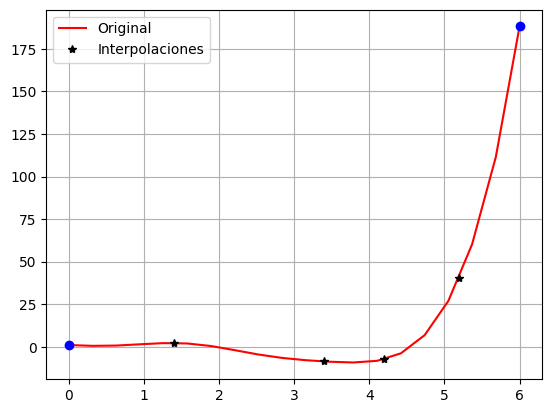

In [9]:
plt.plot(x,y,'-r',label='Original')
plt.plot(XX,YY,'*k',label='Interpolaciones')
plt.plot(x[0],y[0],'ob')
plt.plot(x[-1],y[-1],'ob')
plt.legend()
plt.grid()
plt.show()

In [13]:
def Lagrange(x,y,XI):
  n=len(x)
  result=0.0

  for i in range(n):
    term=y[i]
    for j in range(n):
      if j!=i:
        term=(XI-x[j])/(x[i]-x[j])*term
    result+=term

  return result

In [14]:
Y_Lagrange=[Lagrange(x,y,XX[i]) for i in range(len(XX))]
Y_Lagrange=np.array(Y_Lagrange)

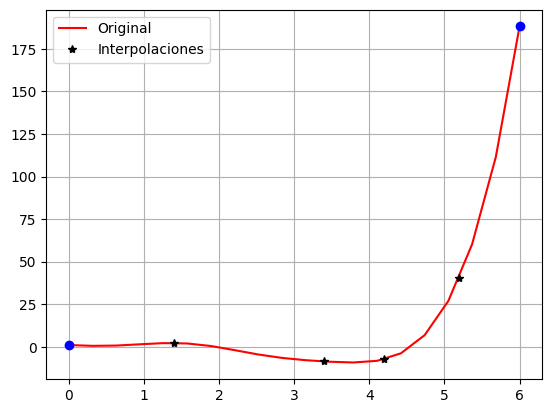

In [15]:
plt.plot(x,y,'-r',label='Original')
plt.plot(XX,Y_Lagrange,'*k',label='Interpolaciones')
plt.plot(x[0],y[0],'ob')
plt.plot(x[-1],y[-1],'ob')
plt.legend()
plt.grid()
plt.show()